**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [4]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [5]:
# Load Data
file_path = './data/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [6]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [7]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [8]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [10]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
# Increase the number of units to 100
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units' 
model.add(Dropout(0.2))  # Experiment with dropout for regularization

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=True))
Dropout(0.2)

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [11]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/100
5/5 [==============================] - 12s 174ms/step - loss: 0.3204
Epoch 2/100
5/5 [==============================] - 1s 177ms/step - loss: 0.1583
Epoch 3/100
5/5 [==============================] - 1s 196ms/step - loss: 0.1309
Epoch 4/100
5/5 [==============================] - 1s 197ms/step - loss: 0.1238
Epoch 5/100
5/5 [==============================] - 2s 329ms/step - loss: 0.1063
Epoch 6/100
5/5 [==============================] - 2s 348ms/step - loss: 0.1107
Epoch 7/100
5/5 [==============================] - 1s 286ms/step - loss: 0.1157
Epoch 8/100
5/5 [==============================] - 2s 264ms/step - loss: 0.1017
Epoch 9/100
5/5 [==============================] - 1s 162ms/step - loss: 0.1062
Epoch 10/100
5/5 [==============================] - 1s 123ms/step - loss: 0.1053
Epoch 11/100
5/5 [==============================] - 1s 103ms/step - loss: 0.0994
Epoch 12/100
5/5 [==============================] - 1s 102ms/step - loss: 0.1114
Epoch 13/100
5/5 [==================

In [12]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 [==============================] - 3s 45ms/step


In [13]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

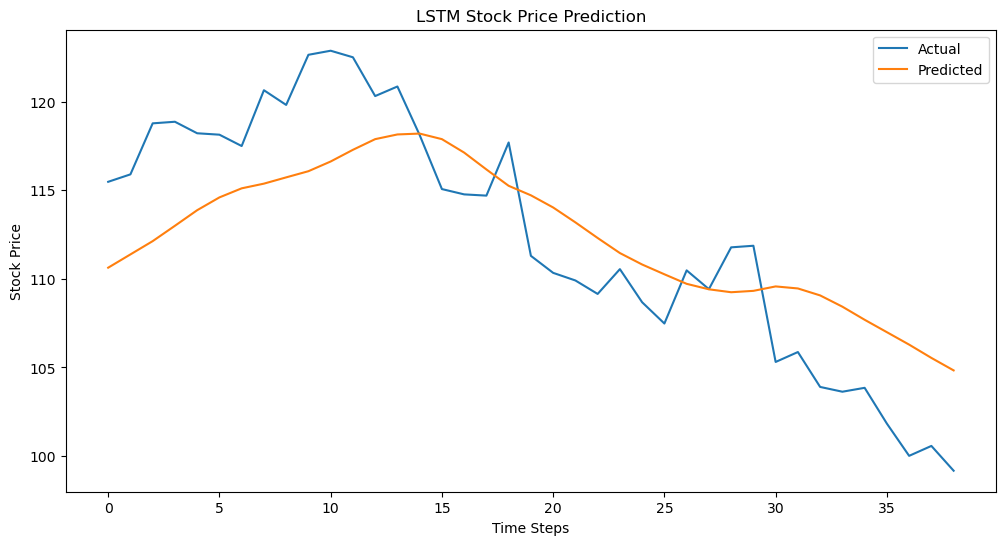

In [14]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


1. By scaling the values to a range between 0 and 1, ensures that all input features are on a consistent scale. This normalization process significantly improves the neural network's ability to learn effectively and converge faster during training. It also helps prevent numerical instability issues that can arise when dealing with very large or very small numbers in computations. Moreover, normalized data often leads to better overall performance of the model, as it allows the optimization process to work more efficiently across all features.

2.  Its primary purpose is to prevent overfitting, which occurs when a model learns the training data too well, including its noise and peculiarities, at the expense of generalizing to new, unseen data. Dropout achieves this by randomly "dropping out" or deactivating a specified fraction of neurons during each training iteration. This process creates a form of model ensembling effect, as it essentially trains many different "thinned" versions of the network, which are then combined at test time. By doing so, Dropout reduces the model's reliance on any specific set of features, forcing it to learn more robust and generalized representations of the data.

3. Tt suggests that the model has successfully learned to predict stock prices with a high degree of accuracy, capturing both short-term fluctuations and long-term trends in the price movements. This close alignment indicates that the model has effectively generalized from the training data to make accurate predictions on the unseen test data, which is a crucial aspect of any predictive model's performance.